## \#0 Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [51]:
df = pd.read_csv('./data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [52]:
# feel for what we have
for c in df.columns:
  print(c,len(df[c].unique()))

# to throw away
  # id, vin, region_url, county, image_url, lat, long

id 426880
url 426880
region 404
region_url 413
price 15655
year 115
manufacturer 43
model 29668
condition 7
cylinders 9
fuel 6
odometer 104871
title_status 7
transmission 4
VIN 118265
drive 4
size 5
type 14
paint_color 13
image_url 241900
description 360912
county 1
state 51
lat 53182
long 53773
posting_date 381537


In [53]:
df.drop(columns=['id', 'VIN', 'region_url','county', 'image_url', 'lat','long'],inplace=True)
df.head()

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date
0,https://prescott.craigslist.org/cto/d/prescott...,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


#### Initial Investiagion

Some weird things I noticed:
- 115 years? (whats the range of age of cars?)
- 13 colors? (seems small)
- 1 county (probably just going to throw column out)

#### Listing Potentially Useful rows


In [54]:
# List of Manufacturers
df.manufacturer.value_counts()[:5]

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: count, dtype: int64

In [55]:
# List of Cylinder Types
df.cylinders.value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [56]:
df.fuel.value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [57]:
df.condition.value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [58]:
# drop b/c we have model/make
df['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [59]:
df['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

#Rows: 426880


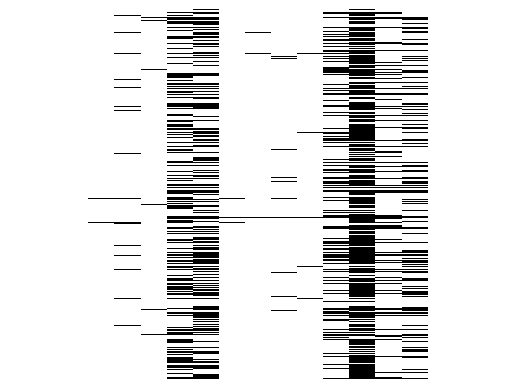

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,xticklabels=False,cbar=False,cmap='Greys')

emptiness = pd.DataFrame()

for feature in df.columns:
    emptiness[feature] = [df[feature].isna().sum()/len(df[feature])]

emptiness

rowsBeforeCleaning = len(df)
print("#Rows:",rowsBeforeCleaning)

### Clean Up Data

Special Cases
- Cylinder: data is ~40% missing, but is potentially not an important feature (potentially drop)
- Condition: data is ~40% missing, but critical to pricing, so we'll drop rows where null
- Drive: data is ~30% missing, drop where null
- Size: data is ~70% missing, potentially drop entire col
- Type: data is ~20% missing, potentially drop (inferred from manufacture/model)
- Paint_Color data is ~30% missing, drop (heard a thing once about it affect pricing, lol)

Less Serious Cases:
- Drop rows where null because so few are missing: 
  - year
  - manufacturer
  - model
  - fuel
  - odometer
  - title_status 
  - transmission
  - description
  - posting_date


In [61]:
# drop these cols
df.drop(columns=['size'],axis=1,inplace=True)

# drop rows where any of these features are NA
toDrop = ['cylinders','condition','drive','type','paint_color',
          'year','manufacturer','model','fuel','odometer','title_status','transmission','description','posting_date'
          ] 
df.dropna(subset=toDrop,inplace=True)


In [62]:
emptiness = pd.DataFrame()

for feature in df.columns:
    emptiness[feature] = [df[feature].isna().sum()/len(df[feature])]

emptiness

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,posting_date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
print("#Rows Previous: {}, #Rows Current: {}, Loss%: {}".format(rowsBeforeCleaning,len(df), 1- (len(df)/rowsBeforeCleaning) ))
print('#Features {}'.format(len(df.columns)))
print('Ratio of #Rows to #Features {}'.format(len(df)/len(df.columns)))

#Rows Previous: 426880, #Rows Current: 115988, Loss%: 0.7282889805097451
#Features 18
Ratio of #Rows to #Features 6443.777777777777


### Recap
👍 Cleaned Up Qualitative Data.

👍 Plenty of rows.

👍 Plenty of features.

👎 Might need to go back and clean up things like 'other' or 'none'

Moving on to quantitative data.

In [64]:
# idenitifying numerical data
df.info()

# price, year, odometer

<class 'pandas.core.frame.DataFrame'>
Index: 115988 entries, 31 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           115988 non-null  object 
 1   region        115988 non-null  object 
 2   price         115988 non-null  int64  
 3   year          115988 non-null  float64
 4   manufacturer  115988 non-null  object 
 5   model         115988 non-null  object 
 6   condition     115988 non-null  object 
 7   cylinders     115988 non-null  object 
 8   fuel          115988 non-null  object 
 9   odometer      115988 non-null  float64
 10  title_status  115988 non-null  object 
 11  transmission  115988 non-null  object 
 12  drive         115988 non-null  object 
 13  type          115988 non-null  object 
 14  paint_color   115988 non-null  object 
 15  description   115988 non-null  object 
 16  state         115988 non-null  object 
 17  posting_date  115988 non-null  object 
dtypes: float

## Price Distribution

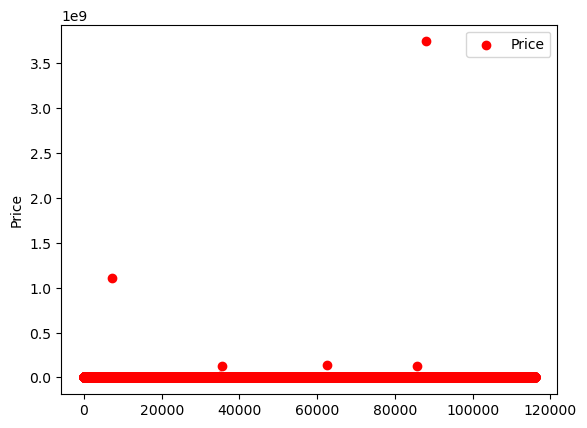

In [65]:
num_df = df

plt.scatter(x=range(len(num_df)),y=num_df['price'].values,color='red',label='Price')

plt.ylabel('Price')

plt.legend()
plt.show()

#### Data Looks Bad
I only considered low outliers (cars listed at $0 for algorithim reasons), but hadn't considered cars listed at absurd prices, trying again with arbitrary cut off should help reveal data shape.

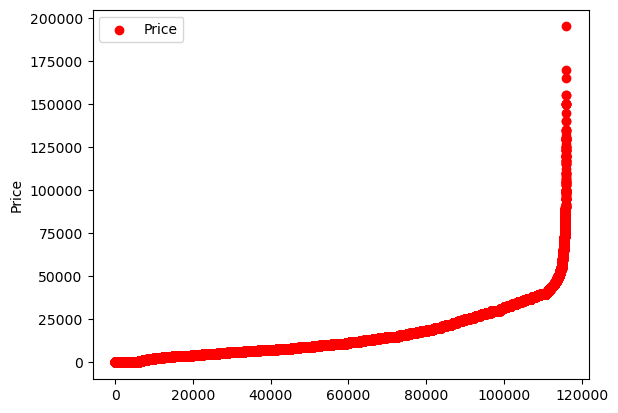

In [66]:
num_df = df[df.price < 200000] # we're only going to consider 

plt.scatter(x=range(len(num_df)),y=num_df['price'].sort_values(),color='red',label='Price')

plt.ylabel('Price')

plt.legend()
plt.show()

#### Distribution Shape

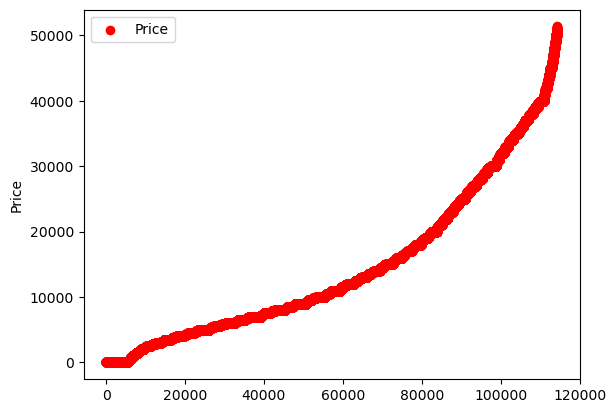

In [67]:
# df['price'].describe()

# arbitrary cut off from elbow of previous graph
df = df[df['price']<200000]

# Empirical rule says 3 standard deviations from mean covers 99.7% of data.
std = df['price'].std()
median = df['price'].median()
empiricalRuleDst = 3*std

df = df[(df['price'] < median+empiricalRuleDst) &
         (df['price'] > median-empiricalRuleDst)]

plt.scatter(x=range(len(df)),y=df['price'].sort_values(),color='red',label='Price')

plt.ylabel('Price')

plt.legend()
plt.show()

## Year Distribution

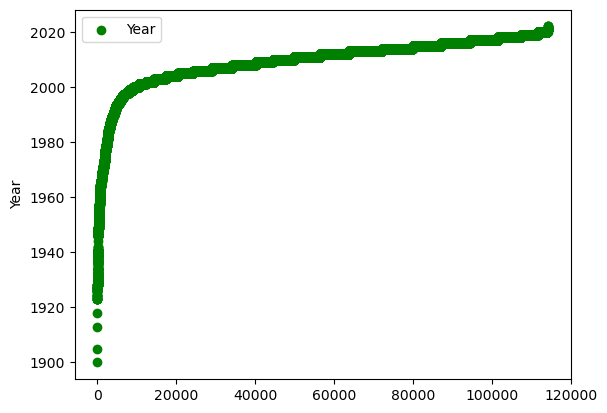

In [68]:
num_df = df

plt.scatter(x=range(len(num_df)),y=num_df['year'].sort_values(),color='green',label='Year')

plt.ylabel('Year')

plt.legend()
plt.show()

Using the empirical rule again to determine best cut off for data

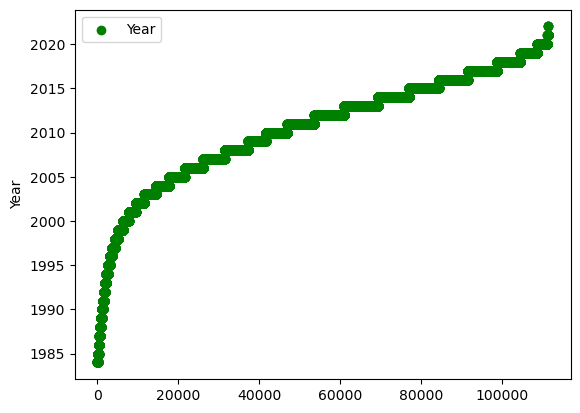

In [69]:

# Empirical rule says 3 standard deviations from mean covers 99.7% of data.
std = df['year'].std()
median = df['year'].median()
empiricalRuleDst = 3*std

df = df[(df['year'] < median+empiricalRuleDst) &
         (df['year'] > median-empiricalRuleDst)]

plt.scatter(x=range(len(df)),y=df['year'].sort_values(),color='green',label='Year')

plt.ylabel('Year')

plt.legend()
plt.show()

## Mileage (Odometer) Distribution

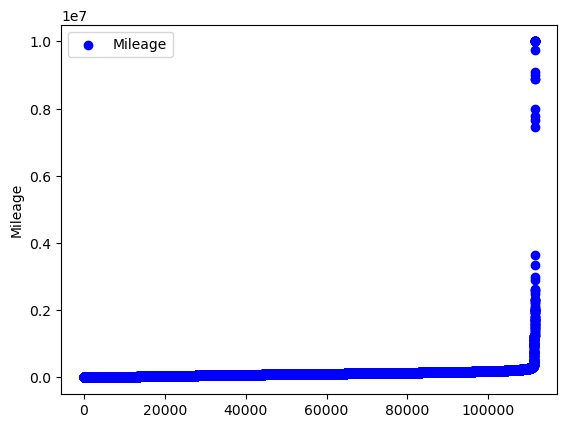

In [70]:
num_df = df

plt.scatter(x=range(len(num_df)),y=num_df['odometer'].sort_values(),color='blue',label='Mileage')

plt.ylabel('Mileage')

plt.legend()
plt.show()

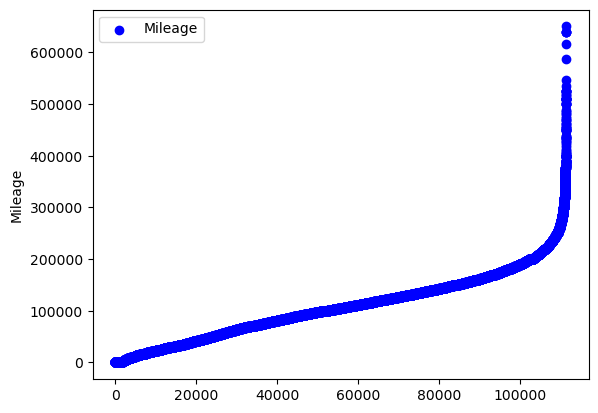

In [71]:
# Empirical rule says 3 standard deviations from mean covers 99.7% of data.
std = df['odometer'].std()
median = df['odometer'].median()
empiricalRuleDst = 3*std

df = df[(df['odometer'] < median+empiricalRuleDst) &
         (df['odometer'] > median-empiricalRuleDst)]

plt.scatter(x=range(len(df)),y=df['odometer'].sort_values(),color='blue',label='Mileage')

plt.ylabel('Mileage')

plt.legend()
plt.show()

Domain Knowledge sugests we hard cut-off at 300k miles. Anything past that is just an outlier of a listing in a practical sense.

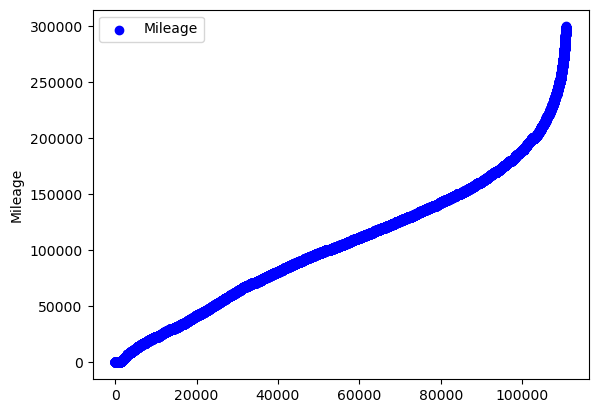

In [72]:
df = df[df['odometer']<300000]
plt.scatter(x=range(len(df)),y=df['odometer'].sort_values(),color='blue',label='Mileage')

plt.ylabel('Mileage')

plt.legend()
plt.show()